# International Macroeconomics

## Final Project

### Done by Iakov Grigoryev.

The numbers near the code cells are in a row since we restarted kernel and ran all the cells from the beginning to make sure that everything is working fine.

In the archive from the website https://www.aeaweb.org/articles?id=10.1257/pandp.20191009 there are not only data files, but also code files, which we are allowed to use. So, to fully replicate the data we obtained (if you want to make sure that the code is working fine), do the following steps:
- Create a folder with a name `Project` somewhere in your disk, place this file (`Project.ipynb`) and a file `regressions.do` from the `files` folder into that `Project` folder. Create an empty folder called `final estimates`. In the file `regressions.do` please write a full path to `Project` folder at the beginning of the file (in the command `cd ...`).
- Download an archive from the website, unzip the folder `code_data` from it into the folder `Project` we created.
- Copy files `create_comtrade.do`, `create_invoice.do`, `create_wdi.do` from the `files` folder to `Project/code_data/stata/databases` with replacement. Open each of them and write the correct paths to these files in the command `cd ...` at the beginning of each file. Create an empty folder `output` in the same folder (`Project/code_data/stata/databases`).
- Copy file `merge_db.do` from the `files` folder to `Project/code_data/stata/analysis` with replacement. You need to change a command `cd ...` at the beginning of the file to the current path of this file.
- Open Stata (we used version 16, but other versions should work fine as well) and execute the files in the following order: `create_comtrade.do`, `create_invoice.do`, `create_wdi.do` and `merge_db.do` (note that they are in the different folders). After that the file `data_file.dta` appears in the folder `Project/code_data/stata/analysis`. Copy it to the `Project` folder and delete `Project/code_data` folder (we do not need it anymore).
- After that execute a file `regressions.do`. This will generate all necessary coefficients and statistics needed to plotting graphs (they will be stored in the folder `Project/final estimates`. After that you can delete `data_file.dta`.

NOTE: every file we executed is properly documented. The file `regressions.do` was written from scratch and it is documented very thoroughly. And here, in Python, we will only plot graphs.

**NOTE: you can simply execute this file without previous steps: it will use `final estimates` folder from the `files` folder**.

### Part A

Start with importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now open files we generated earlier:

In [2]:
coef_overall_exp_mat = pd.read_excel('final estimates/coef_overall_exp.xlsx')
coef_overall_imp_mat = pd.read_excel('final estimates/coef_overall_imp.xlsx')

cov_overall_exp_mat = pd.read_excel('final estimates/cov_overall_exp.xlsx')
cov_overall_imp_mat = pd.read_excel('final estimates/cov_overall_imp.xlsx')

Extract coefficients:

In [3]:
# the first column is names of variables, so we start with column #1 (instead of #0)

alpha_coef_exp_vec = np.float64(np.array(coef_overall_exp_mat.iloc[0, 1:4]))
alpha_coef_imp_vec = np.float64(np.array(coef_overall_imp_mat.iloc[0, 1:4]))

eta_coef_exp_vec = np.float64(np.array(coef_overall_exp_mat.iloc[0, 4:7]))
eta_coef_imp_vec = np.float64(np.array(coef_overall_imp_mat.iloc[0, 4:7]))

beta_coef_exp_vec = np.float64(np.array(coef_overall_exp_mat.iloc[0, 7:10]))
beta_coef_imp_vec = np.float64(np.array(coef_overall_imp_mat.iloc[0, 7:10]))

psi_coef_exp_vec = np.float64(np.array(coef_overall_exp_mat.iloc[0, 10:13]))
psi_coef_imp_vec = np.float64(np.array(coef_overall_imp_mat.iloc[0, 10:13]))

Now we will calculate covariance matrices for different pairs of coefficients:

In [4]:
# column number is incremented since the first column consists of variable names

alpha_eta_cov_exp_mat = np.array(cov_overall_exp_mat.iloc[0:6, 1:7])
beta_psi_cov_exp_mat = np.array(cov_overall_exp_mat.iloc[6:12, 7:13])

alpha_eta_cov_imp_mat = np.array(cov_overall_imp_mat.iloc[0:6, 1:7])
beta_psi_cov_imp_mat = np.array(cov_overall_imp_mat.iloc[6:12, 7:13])

Now we are ready to plot!

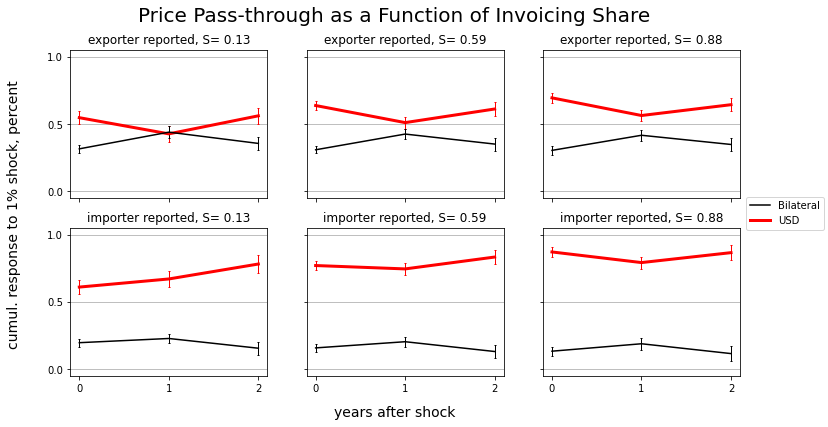

In [5]:
# our plots will have shared axes
fig, ax = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey=True, squeeze=True)

fig.suptitle('Price Pass-through as a Function of Invoicing Share', fontsize=20)

fig.text(0.5, 0.04, 'years after shock', ha='center', va='center', fontsize=14) # shared x label
fig.text(0.06, 0.5, 'cumul. response to 1% shock, percent', 
         ha='center', va='center', rotation='vertical', fontsize=14) # shared y label

x_splitting_vec = np.array([0, 1, 2]) # shared x axis: years after shock

# let us make a function which takes S, and whether it is exporter or importer and calculates curves and errors

def curve_and_error(S, is_exporter):
    
    if is_exporter:
        
        alpha_coef_vec = alpha_coef_exp_vec
        eta_coef_vec = eta_coef_exp_vec
        beta_coef_vec = beta_coef_exp_vec
        psi_coef_vec = psi_coef_exp_vec
        
        alpha_eta_cov_mat = alpha_eta_cov_exp_mat
        beta_psi_cov_mat = beta_psi_cov_exp_mat
        
    else:
        
        alpha_coef_vec = alpha_coef_imp_vec
        eta_coef_vec = eta_coef_imp_vec
        beta_coef_vec = beta_coef_imp_vec
        psi_coef_vec = psi_coef_imp_vec
        
        alpha_eta_cov_mat = alpha_eta_cov_imp_mat
        beta_psi_cov_mat = beta_psi_cov_imp_mat
        
    # NOTE:
    """
    # calculate dollar effect (we take delta_e_Sj = 1 and delta_e_ij = 0)
    dollar_effect_vec = beta_coef_vec + psi_coef_vec * S                  # this year influence
    dollar_effect_vec[1:] += beta_coef_vec[0:2] + psi_coef_vec[0:2] * S   # last year influence
    dollar_effect_vec[2] += beta_coef_vec[0] + psi_coef_vec[0] * S        # year before last influence
    """

    # the same can be done using np.cumsum() and you can check that (and for the rest calculations we will be using this function):
    dollar_effect_vec = np.cumsum(beta_coef_vec + psi_coef_vec * S)

    # calculate bilateral effect (we take delta_e_Sj = 0 and delta_e_ij = 1)
    bilateral_effect_vec = np.cumsum(alpha_coef_vec + eta_coef_vec * S)

    # we should calculate 95% confidence intervals; to do that, we will need to find variances of cumulative coefficients we found
    # after that we will take coef +- 1.96 * sqrt(variance) as a 95% CI (formula from statistics), where 1.96 is 97.5% normal distribution quantile

    # we can calculate variances using covariance submatrices we calculated; firstly, we should multiply some 3*3 subsubmatrices by S or S^2
    # (depending on whether any psi is included linearly or quadratically); after some thinking we can conclude that we should multiply
    # [3:6, 3:6] submatrix by S^2 and two submatrices [0:3, 3:6] and [3:6, 0:3] by S

    beta_psi_cov_copy_mat = np.copy(beta_psi_cov_mat)
    beta_psi_cov_copy_mat[3:6, 3:6] *= S**2
    beta_psi_cov_copy_mat[0:3, 3:6] *= S
    beta_psi_cov_copy_mat[3:6, 0:3] *= S

    # note that for x = 0 we need only [[0, 3], [0, 3]] submatrix of this matrix (because only beta_0 and psi_0 * S are included)
    # for x = 1 it is [[0:2, 3:5], [0:2, 3:5]] and for x = 2 it is the whole matrix
    dollar_error_vec = 1.96 * np.sqrt(np.array([
        np.sum(beta_psi_cov_copy_mat[np.ix_([0, 3],[0, 3])], axis=None),
        np.sum(beta_psi_cov_copy_mat[np.ix_([0, 1, 3, 4], [0, 1, 3, 4])], axis=None),
        np.sum(beta_psi_cov_copy_mat, axis=None)
    ]))

    # for the rest calculations we won't comment since the explanation is the same

    alpha_eta_cov_copy_mat = np.copy(alpha_eta_cov_mat)
    alpha_eta_cov_copy_mat[3:6, 3:6] *= S**2
    alpha_eta_cov_copy_mat[0:3, 3:6] *= S
    alpha_eta_cov_copy_mat[3:6, 0:3] *= S

    bilateral_error_vec = 1.96 * np.sqrt(np.array([
        np.sum(alpha_eta_cov_copy_mat[np.ix_([0, 3],[0, 3])], axis=None),
        np.sum(alpha_eta_cov_copy_mat[np.ix_([0, 1, 3, 4], [0, 1, 3, 4])], axis=None),
        np.sum(alpha_eta_cov_copy_mat, axis=None)
    ]))
    
    title = f'{"ex" if is_exporter else "im"}porter reported, S={S: .2f}'
    
    return dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title

# and let us write another function, which will plot the results in each subplot
def plot_curve_and_error(axis_1, axis_2, dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title):
    ax[axis_1, axis_2].plot(x_splitting_vec, dollar_effect_vec, 'r', linewidth=3, label="USD")
    ax[axis_1, axis_2].errorbar(
        x_splitting_vec, dollar_effect_vec, yerr = dollar_error_vec, 
        fmt='.k', ecolor="r", markersize='.1', elinewidth = 1, capsize = 1
    )

    ax[axis_1, axis_2].plot(x_splitting_vec, bilateral_effect_vec, 'k', label="Bilateral")
    ax[axis_1, axis_2].errorbar(
        x_splitting_vec, bilateral_effect_vec, yerr = bilateral_error_vec, 
        fmt='.k', ecolor="k", markersize='.1', elinewidth = 1, capsize = 1
    )

    ax[axis_1, axis_2].set_title(title)
    ax[axis_1, axis_2].set_xticks(x_splitting_vec)
    ax[axis_1, axis_2].set_yticks(np.arange(0, 2, 0.5))
    ax[axis_1, axis_2].grid(True, axis = 'y')            
    ax[axis_1, axis_2].axis([None, None, -0.05, 1.05])

# exporter reported, S=.13

S = 0.13
is_exporter = True

dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title = curve_and_error(S, is_exporter)

plot_curve_and_error(0, 0, dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title)

# exporter reported, S=.59

S = 0.59
is_exporter = True

dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title = curve_and_error(S, is_exporter)

plot_curve_and_error(0, 1, dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title)

# exporter reported, S=.88

S = 0.88
is_exporter = True

dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title = curve_and_error(S, is_exporter)

plot_curve_and_error(0, 2, dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title)

# importer reported, S=.13

S = 0.13
is_exporter = False

dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title = curve_and_error(S, is_exporter)

plot_curve_and_error(1, 0, dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title)

# importer reported, S=.59

S = 0.59
is_exporter = False

dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title = curve_and_error(S, is_exporter)

plot_curve_and_error(1, 1, dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title)

# importer reported, S=.88

S = 0.88
is_exporter = False

dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title = curve_and_error(S, is_exporter)

plot_curve_and_error(1, 2, dollar_effect_vec, bilateral_effect_vec, dollar_error_vec, bilateral_error_vec, title)

handle_vec, label_vec = ax[1, 2].get_legend_handles_labels()
fig.legend(reversed(handle_vec), reversed(label_vec), loc='right')
plt.show()

Hooray! Looks like we replicated Figure 2 from the article.

### Part B

Now it is time to plot graphs for part B. We already performed all regressions we needed. Firstly, open files we generated earlier:

In [6]:
# note that we do not need constants, so we ignore 4 column
# note that a first exp/imp is about reporters and a second exp/imp is about a country
coef_arg_exp_exp_vec = np.float64(pd.read_excel("final estimates/coef_arg_exp_exp.xlsx").iloc[0, 1:4].values)
coef_arg_exp_imp_vec = np.float64(pd.read_excel("final estimates/coef_arg_exp_imp.xlsx").iloc[0, 1:4].values)
coef_arg_imp_exp_vec = np.float64(pd.read_excel("final estimates/coef_arg_imp_exp.xlsx").iloc[0, 1:4].values)
coef_arg_imp_imp_vec = np.float64(pd.read_excel("final estimates/coef_arg_imp_imp.xlsx").iloc[0, 1:4].values)
coef_swi_exp_exp_vec = np.float64(pd.read_excel("final estimates/coef_swi_exp_exp.xlsx").iloc[0, 1:4].values)
coef_swi_exp_imp_vec = np.float64(pd.read_excel("final estimates/coef_swi_exp_imp.xlsx").iloc[0, 1:4].values)
coef_swi_imp_exp_vec = np.float64(pd.read_excel("final estimates/coef_swi_imp_exp.xlsx").iloc[0, 1:4].values)
coef_swi_imp_imp_vec = np.float64(pd.read_excel("final estimates/coef_swi_imp_imp.xlsx").iloc[0, 1:4].values)
coef_tur_exp_exp_vec = np.float64(pd.read_excel("final estimates/coef_tur_exp_exp.xlsx").iloc[0, 1:4].values)
coef_tur_exp_imp_vec = np.float64(pd.read_excel("final estimates/coef_tur_exp_imp.xlsx").iloc[0, 1:4].values)
coef_tur_imp_exp_vec = np.float64(pd.read_excel("final estimates/coef_tur_imp_exp.xlsx").iloc[0, 1:4].values)
coef_tur_imp_imp_vec = np.float64(pd.read_excel("final estimates/coef_tur_imp_imp.xlsx").iloc[0, 1:4].values)

cov_arg_exp_exp_mat = pd.read_excel("final estimates/cov_arg_exp_exp.xlsx").iloc[0:3, 1:4].values
cov_arg_exp_imp_mat = pd.read_excel("final estimates/cov_arg_exp_imp.xlsx").iloc[0:3, 1:4].values
cov_arg_imp_exp_mat = pd.read_excel("final estimates/cov_arg_imp_exp.xlsx").iloc[0:3, 1:4].values
cov_arg_imp_imp_mat = pd.read_excel("final estimates/cov_arg_imp_imp.xlsx").iloc[0:3, 1:4].values
cov_swi_exp_exp_mat = pd.read_excel("final estimates/cov_swi_exp_exp.xlsx").iloc[0:3, 1:4].values
cov_swi_exp_imp_mat = pd.read_excel("final estimates/cov_swi_exp_imp.xlsx").iloc[0:3, 1:4].values
cov_swi_imp_exp_mat = pd.read_excel("final estimates/cov_swi_imp_exp.xlsx").iloc[0:3, 1:4].values
cov_swi_imp_imp_mat = pd.read_excel("final estimates/cov_swi_imp_imp.xlsx").iloc[0:3, 1:4].values
cov_tur_exp_exp_mat = pd.read_excel("final estimates/cov_tur_exp_exp.xlsx").iloc[0:3, 1:4].values
cov_tur_exp_imp_mat = pd.read_excel("final estimates/cov_tur_exp_imp.xlsx").iloc[0:3, 1:4].values
cov_tur_imp_exp_mat = pd.read_excel("final estimates/cov_tur_imp_exp.xlsx").iloc[0:3, 1:4].values
cov_tur_imp_imp_mat = pd.read_excel("final estimates/cov_tur_imp_imp.xlsx").iloc[0:3, 1:4].values

Let us write a function that will calculate curves and errors:

In [7]:
def curve_and_error_country(country, S):
    
    if (country == "arg"):
        
        coef_exp_exp_vec = coef_arg_exp_exp_vec
        coef_exp_imp_vec = coef_arg_exp_imp_vec
        coef_imp_exp_vec = coef_arg_imp_exp_vec
        coef_imp_imp_vec = coef_arg_imp_imp_vec
        
        cov_exp_exp_mat = cov_arg_exp_exp_mat
        cov_exp_imp_mat = cov_arg_exp_imp_mat
        cov_imp_exp_mat = cov_arg_imp_exp_mat
        cov_imp_imp_mat = cov_arg_imp_imp_mat
        
    elif (country == "swi"):
        
        coef_exp_exp_vec = coef_swi_exp_exp_vec
        coef_exp_imp_vec = coef_swi_exp_imp_vec
        coef_imp_exp_vec = coef_swi_imp_exp_vec
        coef_imp_imp_vec = coef_swi_imp_imp_vec
        
        cov_exp_exp_mat = cov_swi_exp_exp_mat
        cov_exp_imp_mat = cov_swi_exp_imp_mat
        cov_imp_exp_mat = cov_swi_imp_exp_mat
        cov_imp_imp_mat = cov_swi_imp_imp_mat
        
    elif (country == "tur"):
        
        coef_exp_exp_vec = coef_tur_exp_exp_vec
        coef_exp_imp_vec = coef_tur_exp_imp_vec
        coef_imp_exp_vec = coef_tur_imp_exp_vec
        coef_imp_imp_vec = coef_tur_imp_imp_vec
        
        cov_exp_exp_mat = cov_tur_exp_exp_mat
        cov_exp_imp_mat = cov_tur_exp_imp_mat
        cov_imp_exp_mat = cov_tur_imp_exp_mat
        cov_imp_imp_mat = cov_tur_imp_imp_mat
        
    # as we showed before, we can apply np.cumsum to calculate cumulative effect
    cumul_exp_exp_vec = np.cumsum(coef_exp_exp_vec)
    cumul_exp_imp_vec = np.cumsum(coef_exp_imp_vec)
    cumul_imp_exp_vec = np.cumsum(coef_imp_exp_vec)
    cumul_imp_imp_vec = np.cumsum(coef_imp_imp_vec)
    
    # as before, we can calculate variances as an element-sum of corresponding submatrix - let us calculate 95% CI at once
    error_exp_exp_vec = 1.96 * np.sqrt(np.array([
        cov_exp_exp_mat[0, 0],
        np.sum(cov_exp_exp_mat[np.ix_([0, 1],[0, 1])], axis=None),
        np.sum(cov_exp_exp_mat, axis=None)
    ]))
    
    error_exp_imp_vec = 1.96 * np.sqrt(np.array([
        cov_exp_imp_mat[0, 0],
        np.sum(cov_exp_imp_mat[np.ix_([0, 1],[0, 1])], axis=None),
        np.sum(cov_exp_imp_mat, axis=None)
    ]))
    
    error_imp_exp_vec = 1.96 * np.sqrt(np.array([
        cov_exp_exp_mat[0, 0],
        np.sum(cov_imp_exp_mat[np.ix_([0, 1],[0, 1])], axis=None),
        np.sum(cov_imp_exp_mat, axis=None)
    ]))
    
    error_imp_imp_vec = 1.96 * np.sqrt(np.array([
        cov_exp_exp_mat[0, 0],
        np.sum(cov_imp_imp_mat[np.ix_([0, 1],[0, 1])], axis=None),
        np.sum(cov_imp_imp_mat, axis=None)
    ]))
    
    title = f'Dollar Invoicing Share of Country is S={S:.2f}'
    
    return (cumul_exp_exp_vec, cumul_exp_imp_vec, cumul_imp_exp_vec, cumul_imp_imp_vec, 
            error_exp_exp_vec, error_exp_imp_vec, error_imp_exp_vec, error_imp_imp_vec, title)

Now let us write a function to actually plot what we calculated:

In [8]:
def plot_curve_and_error_country (
    country_name,
    cumul_exp_exp_vec, cumul_exp_imp_vec, cumul_imp_exp_vec, cumul_imp_imp_vec, 
    error_exp_exp_vec, error_exp_imp_vec, error_imp_exp_vec, error_imp_imp_vec, title
):
    fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True, squeeze=True)

    fig.suptitle(title, fontsize=20)

    fig.text(0.5, 0.04, 'years after shock', ha='center', va='center', fontsize=14) # shared x label
    fig.text(0.06, 0.5, 'cumul. response to 1% shock, percent', 
             ha='center', va='center', rotation='vertical', fontsize=14) # shared y label

    x_splitting_vec = np.array([0, 1, 2]) # shared x axis: years after shock
    
    def subplot(axis_1, axis_2, cumul_vec, error_vec, sub_title):
        ax[axis_1, axis_2].plot(x_splitting_vec, cumul_vec, 'r')
        ax[axis_1, axis_2].errorbar(
            x_splitting_vec, cumul_vec, yerr = error_vec, 
            fmt='.k', ecolor="r", markersize='.1', elinewidth = 1, capsize = 1
        )

        ax[axis_1, axis_2].set_title(sub_title)
        ax[axis_1, axis_2].set_xticks(x_splitting_vec)
        ax[axis_1, axis_2].set_yticks(np.arange(-1, 2, 0.5))
        ax[axis_1, axis_2].grid(True, axis = 'y')            
        ax[axis_1, axis_2].axis([None, None, -0.55, 1.55])
        
    subplot(0, 0, cumul_exp_exp_vec, error_exp_exp_vec, f"exporter reported: export by {country_name}")
    subplot(0, 1, cumul_exp_imp_vec, error_exp_imp_vec, f"exporter reported: import by {country_name}")
    subplot(1, 0, cumul_imp_exp_vec, error_imp_exp_vec, f"importer reported: export by {country_name}")
    subplot(1, 1, cumul_imp_imp_vec, error_imp_imp_vec, f"importer reported: import by {country_name}")
    
    plt.show()

Finally, plot! Dollar invoicing share was taken from the dataset (we manually found it in Stata).

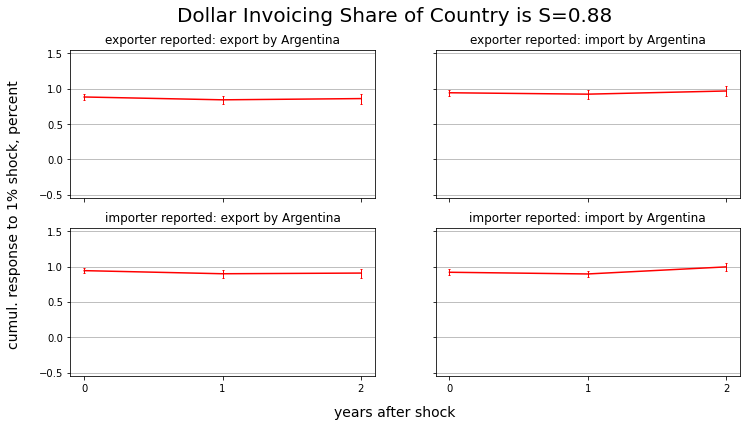

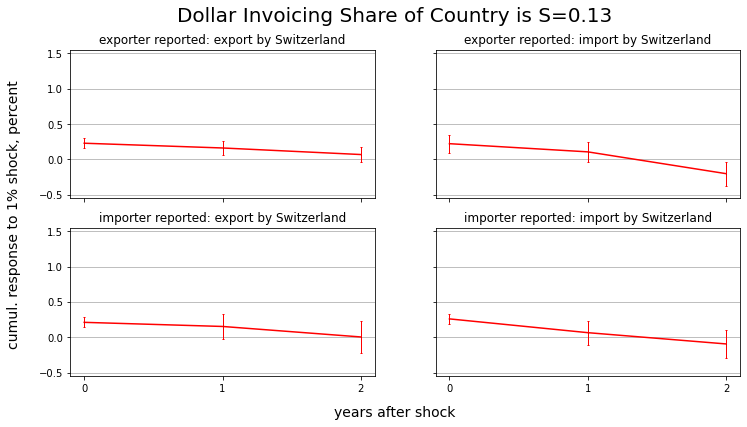

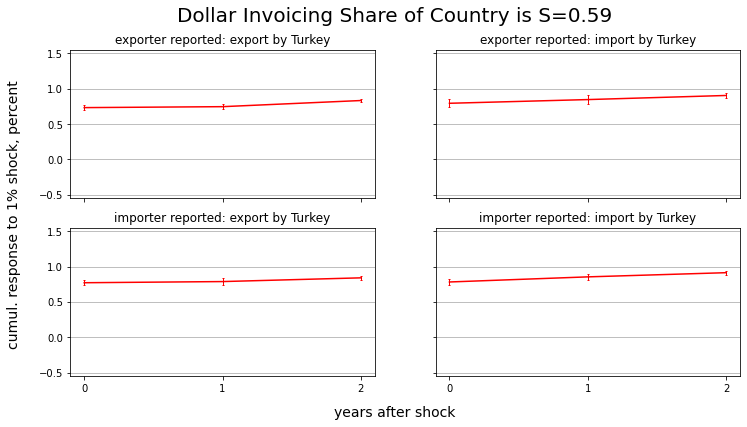

In [9]:
# Argentina
country = "arg"
country_name = "Argentina"
S = 0.88

(cumul_exp_exp_vec, cumul_exp_imp_vec, cumul_imp_exp_vec, cumul_imp_imp_vec, 
 error_exp_exp_vec, error_exp_imp_vec, error_imp_exp_vec, error_imp_imp_vec, title) = curve_and_error_country(country, S)

plot_curve_and_error_country (
    country_name,
    cumul_exp_exp_vec, cumul_exp_imp_vec, cumul_imp_exp_vec, cumul_imp_imp_vec, 
    error_exp_exp_vec, error_exp_imp_vec, error_imp_exp_vec, error_imp_imp_vec, title
)

# Switzerland
country = "swi"
country_name = "Switzerland"
S = 0.13

(cumul_exp_exp_vec, cumul_exp_imp_vec, cumul_imp_exp_vec, cumul_imp_imp_vec, 
 error_exp_exp_vec, error_exp_imp_vec, error_imp_exp_vec, error_imp_imp_vec, title) = curve_and_error_country(country, S)

plot_curve_and_error_country (
    country_name,
    cumul_exp_exp_vec, cumul_exp_imp_vec, cumul_imp_exp_vec, cumul_imp_imp_vec, 
    error_exp_exp_vec, error_exp_imp_vec, error_imp_exp_vec, error_imp_imp_vec, title
)

# Turkey
country = "tur"
country_name = "Turkey"
S = 0.59

(cumul_exp_exp_vec, cumul_exp_imp_vec, cumul_imp_exp_vec, cumul_imp_imp_vec, 
 error_exp_exp_vec, error_exp_imp_vec, error_imp_exp_vec, error_imp_imp_vec, title) = curve_and_error_country(country, S)

plot_curve_and_error_country (
    country_name,
    cumul_exp_exp_vec, cumul_exp_imp_vec, cumul_imp_exp_vec, cumul_imp_imp_vec, 
    error_exp_exp_vec, error_exp_imp_vec, error_imp_exp_vec, error_imp_imp_vec, title
)

Finally, we will state some differences between found figures and Figure 2 from the article:
- First, we have no $ S $ in the second regression, so, we didn't take into account dollar invoicing share, and for that reason the cumulative effect is different.
- Second, we have no $ \Delta e_{ij} $ in the second regression as well.
- Third, not the same effects are plotted: in the second case we cannot measure an effect of changing $ \Delta e_{ij} $! We can somehow compare red lines on both figures, but they are not so similar (and that is because of lack of $ \Delta e_{ij} $ and $ S $ in the second regression).